<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parameter estimation by optimization
>* Optimal parameters: how to find them
>* Your parameters are only good when your model fits your data
>* Goodness of fit is a good tool to see how well or significantly your data fits the model.


In [12]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np

import pandas as pd

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/mlb_nohitters.csv'
nohitter_times = np.loadtxt(fname=file_path, skiprows=1, usecols=range(1,2), delimiter=',')
#print(nohitter_times)

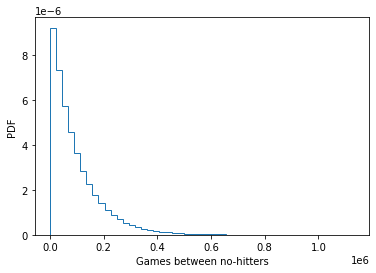

In [14]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [1]:
!mv /content/mlb_nohitters.csv /content/drive/MyDrive/datasets